<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# A simplistic approach to time series modeling

---


<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-simplistic-approach-to-time-series-modeling" data-toc-modified-id="A-simplistic-approach-to-time-series-modeling-1">A simplistic approach to time series modeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-stock-data" data-toc-modified-id="Load-the-stock-data-1.0.1">Load the stock data</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.0.1.1">Load the data</a></span></li><li><span><a href="#Sort-the-rows-by-Date-in-ascending-order" data-toc-modified-id="Sort-the-rows-by-Date-in-ascending-order-1.0.1.2">Sort the rows by <code>Date</code> in ascending order</a></span></li></ul></li><li><span><a href="#Make-the-Date-column-the-index-of-the-DataFrame." data-toc-modified-id="Make-the-Date-column-the-index-of-the-DataFrame.-1.0.2">Make the <code>Date</code> column the index of the DataFrame.</a></span></li><li><span><a href="#Predicting-price-developments" data-toc-modified-id="Predicting-price-developments-1.0.3">Predicting price developments</a></span><ul class="toc-item"><li><span><a href="#Create-the-data-frame" data-toc-modified-id="Create-the-data-frame-1.0.3.1">Create the data frame</a></span></li><li><span><a href="#Drop-missing-values" data-toc-modified-id="Drop-missing-values-1.0.3.2">Drop missing values</a></span></li><li><span><a href="#Look-at-correlations-between-the-variables" data-toc-modified-id="Look-at-correlations-between-the-variables-1.0.3.3">Look at correlations between the variables</a></span></li><li><span><a href="#Extract-the-outcome-variable" data-toc-modified-id="Extract-the-outcome-variable-1.0.3.4">Extract the outcome variable</a></span></li><li><span><a href="#Create-a-train-test" data-toc-modified-id="Create-a-train-test-1.0.3.5">Create a train-test</a></span></li><li><span><a href="#Fit-a-linear-regression-model-and-evaluate-it-on-the-train-and-test-set." data-toc-modified-id="Fit-a-linear-regression-model-and-evaluate-it-on-the-train-and-test-set.-1.0.3.6">Fit a linear regression model and evaluate it on the train and test set.</a></span></li><li><span><a href="#Obtain-the-prediction-for-the-train-and-test-set-and-plot-them-together-with-the-true-values." data-toc-modified-id="Obtain-the-prediction-for-the-train-and-test-set-and-plot-them-together-with-the-true-values.-1.0.3.7">Obtain the prediction for the train and test set and plot them together with the true values.</a></span></li><li><span><a href="#Fit-a-random-forest-model-instead.-Does-that-lead-to-an-improvement?" data-toc-modified-id="Fit-a-random-forest-model-instead.-Does-that-lead-to-an-improvement?-1.0.3.8">Fit a random forest model instead. Does that lead to an improvement?</a></span></li></ul></li><li><span><a href="#Fit-a-linear-regression-model-taking-additionally-the-prices-of-the-day-before-yesterday-as-predictors-into-account." data-toc-modified-id="Fit-a-linear-regression-model-taking-additionally-the-prices-of-the-day-before-yesterday-as-predictors-into-account.-1.0.4">Fit a linear regression model taking additionally the prices of the day before yesterday as predictors into account.</a></span></li><li><span><a href="#Fitting-a-classification-model" data-toc-modified-id="Fitting-a-classification-model-1.0.5">Fitting a classification model</a></span><ul class="toc-item"><li><span><a href="#Predict-rise-or-drop-with-yesterday's-close-price-and-today's-open-price." data-toc-modified-id="Predict-rise-or-drop-with-yesterday's-close-price-and-today's-open-price.-1.0.5.1">Predict rise or drop with yesterday's close price and today's open price.</a></span></li><li><span><a href="#Determine-the-baseline-for-the-model" data-toc-modified-id="Determine-the-baseline-for-the-model-1.0.5.2">Determine the baseline for the model</a></span></li><li><span><a href="#Create-a-train-test-split" data-toc-modified-id="Create-a-train-test-split-1.0.5.3">Create a train-test split</a></span></li><li><span><a href="#Fit-and-evaluate-a-logistic-regression-model." data-toc-modified-id="Fit-and-evaluate-a-logistic-regression-model.-1.0.5.4">Fit and evaluate a logistic regression model.</a></span></li><li><span><a href="#Fit-and-evaluate-a-random-forest-classifier." data-toc-modified-id="Fit-and-evaluate-a-random-forest-classifier.-1.0.5.5">Fit and evaluate a random forest classifier.</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Problem Statement

Are we able to predict stock price of Apple (AAPL) based on historical data?
We have obtained one year of daily stock data from 2016 to 2017.

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

#### Load the data

In [2]:
df = pd.read_csv('./datasets/aapl.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Open    251 non-null    float64       
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
 4   Close   251 non-null    float64       
 5   Volume  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


#### Sort the rows by `Date` in ascending order

In [5]:
df = df.sort_values('Date')
df

,Date,Open,High,Low,Close,Volume
250,2016-01-19,98.41,98.65,95.50,96.66,52841349
249,2016-01-20,95.10,98.19,93.42,96.79,72008265
248,2016-01-21,97.06,97.88,94.94,96.30,52054521
247,2016-01-22,98.63,101.46,98.37,101.42,65562769
246,2016-01-25,101.52,101.53,99.21,99.44,51196375
...,...,...,...,...,...,...
4,2017-01-09,117.95,119.43,117.94,118.99,33561948
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
1,2017-01-12,118.90,119.30,118.21,119.25,27086220


### Make the `Date` column the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in dataframe objects indexed by DateTime - literally Time Series!

In [6]:
df.set_index('Date',inplace=True,drop=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375
...,...,...,...,...,...
2017-01-09,117.95,119.43,117.94,118.99,33561948
2017-01-10,118.77,119.38,118.30,119.11,24462051
2017-01-11,118.74,119.93,118.60,119.75,27588593


In [7]:
df.index.name = None

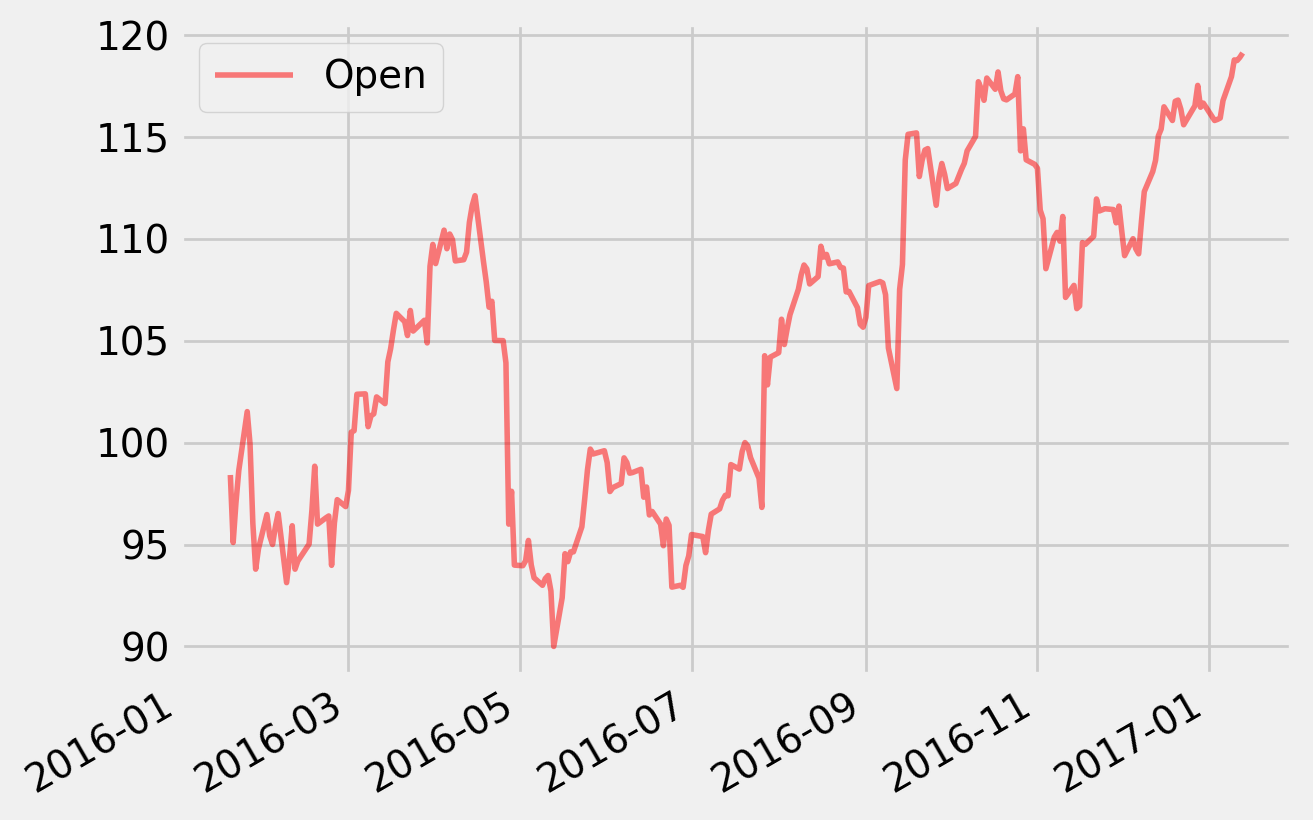

In [8]:
#make a quick plot of open, high, low, close
df['Open'].plot(color='red', alpha=0.5, linewidth=2, label='Open')
plt.legend()
plt.show()

### Predicting price developments

Let's create a simple predictive model for time series.
- As the outcome variable we take today's Close price. 
- As predictors we use yesterday's Close price and today's Open price. 

#### Create the data frame

Use `.shift()` to create a column containing yesterday's closing prices.

In [10]:
df['Close_Day_Before'] = df.Close.shift(1)
X = df[['Close','Close_Day_Before','Open']].copy()
X.head()

,Close,Close_Day_Before,Open
2016-01-19,96.66,NaN,98.41
2016-01-20,96.79,96.66,95.10
2016-01-21,96.30,96.79,97.06
2016-01-22,101.42,96.30,98.63
2016-01-25,99.44,101.42,101.52


#### Drop missing values

In [11]:
X.dropna(inplace=True)

#### Look at correlations between the variables

In [12]:
X.corr()

,Close,Close_Day_Before,Open
Close,1.000000,0.983595,0.991481
Close_Day_Before,0.983595,1.000000,0.991689
Open,0.991481,0.991689,1.000000


#### Extract the outcome variable

In [13]:
y = X.pop('Close')

#### Create a train-test

Make sure to split in the order of the dates (why???)

Do we still need `sklearn.model_selection.train_test_split`??

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

In [14]:
# Or just specify the number of days to use for training
n = 150
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]

In [15]:
# Check the training and test sets
X_train

,Close_Day_Before,Open
2016-01-20,96.66,95.10
2016-01-21,96.79,97.06
2016-01-22,96.30,98.63
2016-01-25,101.42,101.52
2016-01-26,99.44,99.93
...,...,...
2016-08-16,109.48,109.63
2016-08-17,109.38,109.10
2016-08-18,109.22,109.23
2016-08-19,109.08,108.77


#### Fit a linear regression model and evaluate it on the train and test set.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9650665422268443
0.934460925710025


#### Obtain the prediction for the train and test set and plot them together with the true values.

In [18]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [19]:
X['predictions'] = np.concatenate([predictions_train,predictions_test])

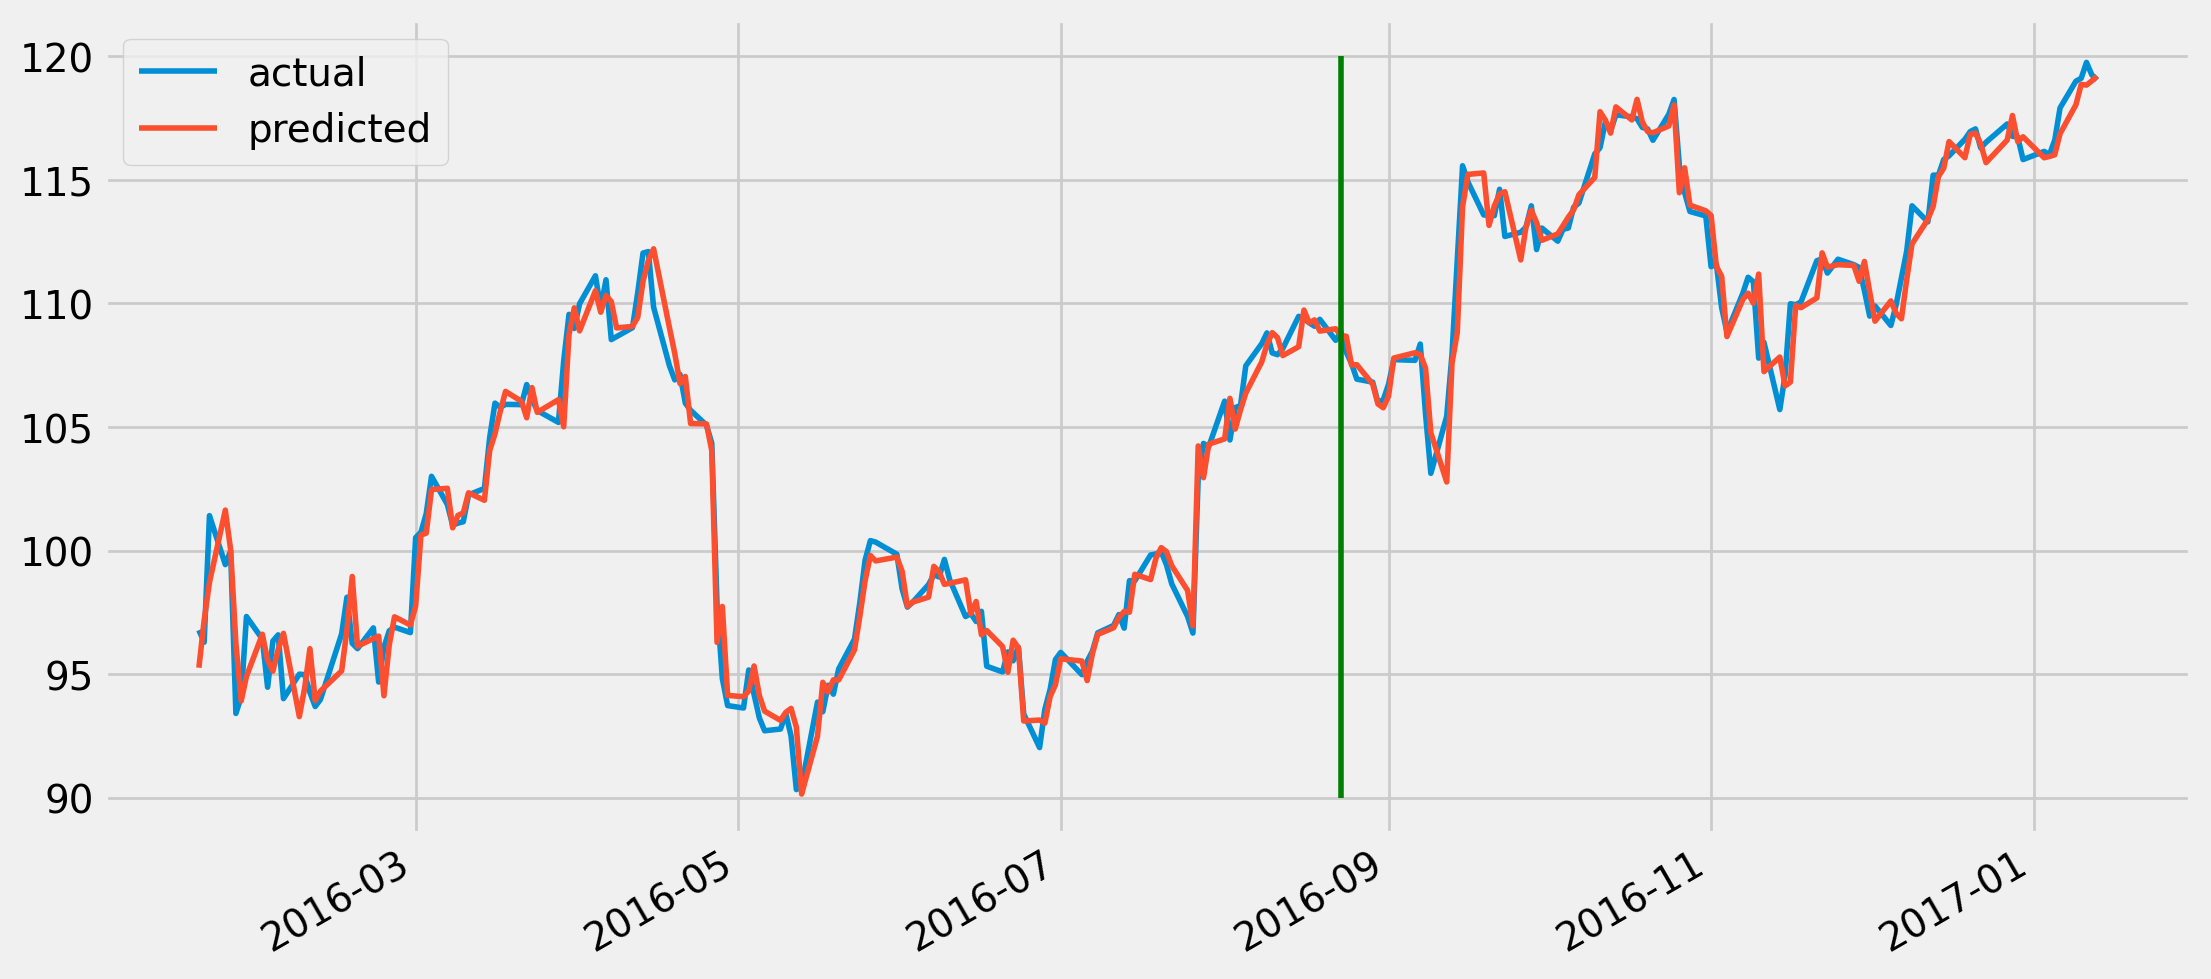

In [20]:
plt.figure(figsize=(12,6))
y.plot( lw=2, label='actual')
X['predictions'].plot(label='predicted', lw=2)

plt.legend()
# we split the training and test set at n
plt.vlines(X.index[n],90,120, color='g', lw=2)
plt.show()

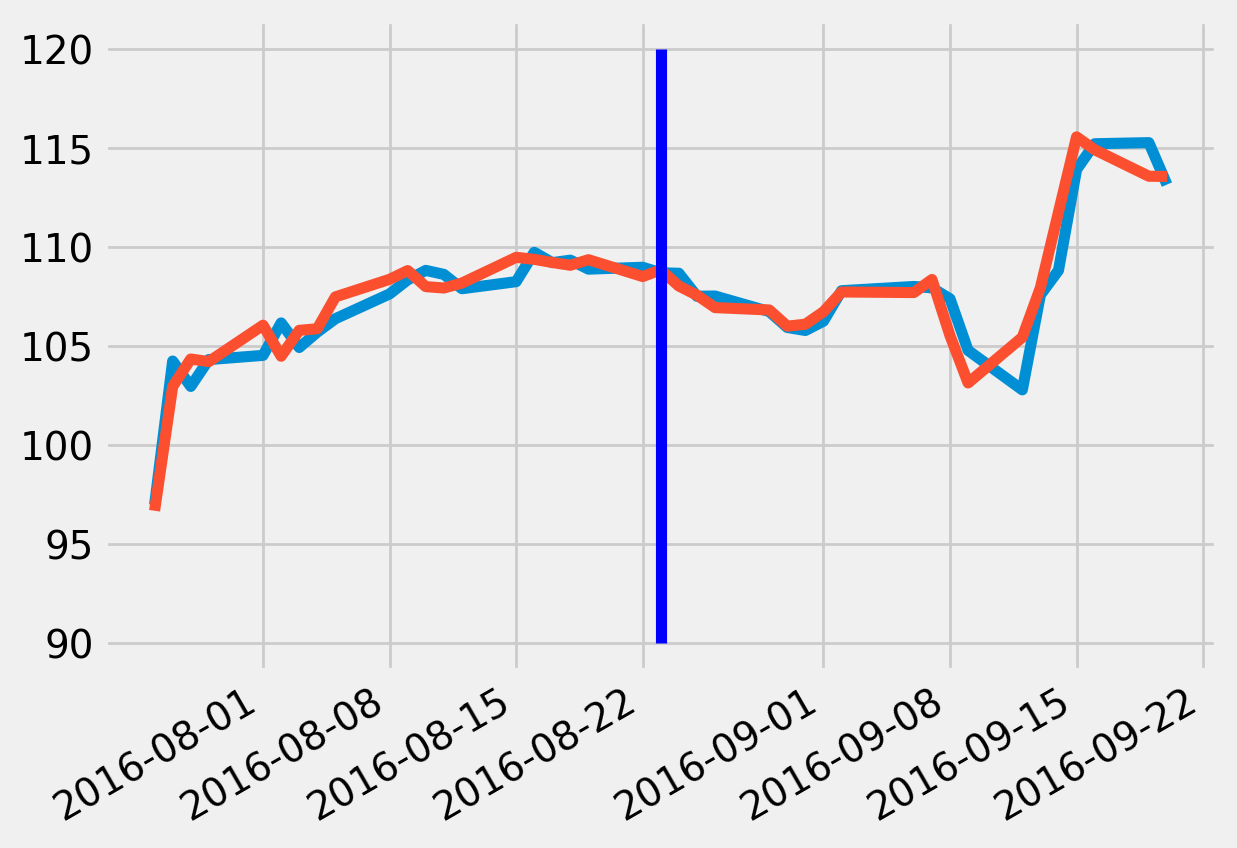

In [21]:
# Take a closer look at the border between the training and test set
X['predictions'][n-20:n+20].plot()
y[n-20:n+20].plot()
plt.vlines(X.index[n],90,120, color='b')
plt.show()

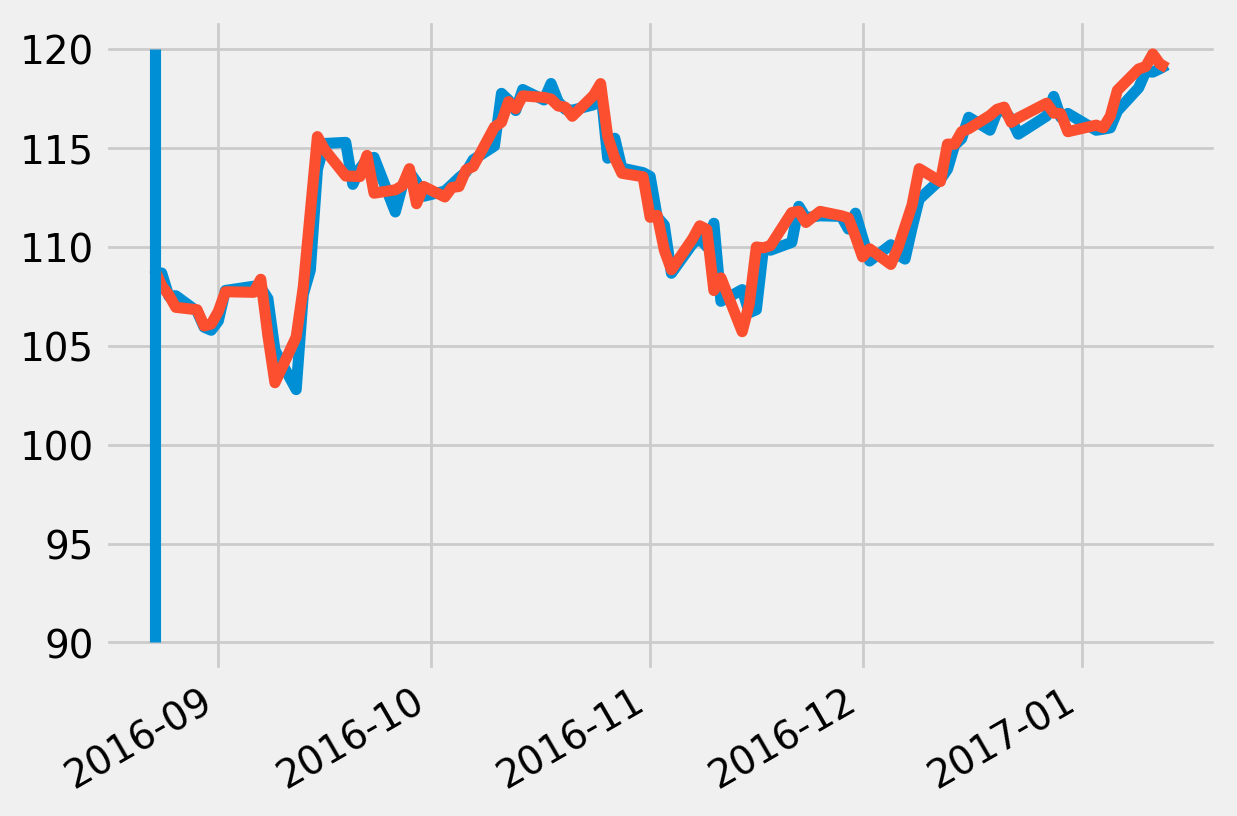

In [22]:
X['predictions'][n:].plot()
y[n:].plot()
plt.vlines(X.index[n],90,120)
plt.show()

#### Fit a random forest model instead. Does that lead to an improvement?

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor(n_estimators=100)
# fit and score
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9927544995338433
-0.21355220732285263


### Fit a linear regression model taking additionally the prices of the day before yesterday as predictors into account.

In [25]:
df['Close_shift_1'] = df.Close.shift(1)
df['Close_shift_2'] = df.Close.shift(2)
X = df[['Close','Close_shift_1','Close_shift_2','Open']].copy()
X.head()

,Close,Close_shift_1,Close_shift_2,Open
2016-01-19,96.66,NaN,NaN,98.41
2016-01-20,96.79,96.66,NaN,95.10
2016-01-21,96.30,96.79,96.66,97.06
2016-01-22,101.42,96.30,96.79,98.63
2016-01-25,99.44,101.42,96.30,101.52


In [26]:
# drop the nulls
X.dropna(inplace=True)

In [27]:
# Get the target column
y=X.pop('Close')

In [28]:
# create training set for first 150 days, test set for remainder
n=150
X_train, y_train=X[:n], y[:n]
X_test, y_test = X[n:], y[n:] 

In [29]:
# Fit and score the Linear Regression model - are the results better?
model2 = LinearRegression()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9661010554298415
0.9339426540672604


Using the previous day's close price and the opening price for Linear Regression is a good prediction model with r2 score of ------, mean square error -----, -----

However this is a very short term model it only uses the previous day's values. It might not be helpful for a longer term  prediction. Recommend only to predict for the current day.

It does however show that the previous day's values are highly correlated with the current day. Even the day before is highly correlated although the correlations score is lower. 

### Fitting a classification model

What if we want to predict whether the price will go **up** or **down** the next day?

Create a binary variable which indicates for consecutive days if the closing price rose or dropped.

In [33]:
df['up'] = (df.Close.diff()>0)*1


In [34]:
df.head()

,Open,High,Low,Close,Volume,Close_Day_Before,Close_shift_1,Close_shift_2,up
2016-01-19,98.41,98.65,95.50,96.66,52841349,NaN,NaN,NaN,0
2016-01-20,95.10,98.19,93.42,96.79,72008265,96.66,96.66,NaN,1
2016-01-21,97.06,97.88,94.94,96.30,52054521,96.79,96.79,96.66,0
2016-01-22,98.63,101.46,98.37,101.42,65562769,96.30,96.30,96.79,1
2016-01-25,101.52,101.53,99.21,99.44,51196375,101.42,101.42,96.30,0


#### Predict rise or drop with yesterday's close price and today's open price.

In [35]:
X = df[['up','Close_shift_1','Open']].copy()
X.dropna(inplace=True)
y = X.pop('up')

#### Determine the baseline for the model

In [36]:
y.value_counts(normalize=True)

1    0.536
0    0.464
Name: up, dtype: float64

#### Create a train-test split

In [37]:
n = 150
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]

#### Fit and evaluate a logistic regression model.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [40]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print(f'Training Accuracy: {lr_model.score(X_train, y_train)}')
print(f'Test Accuracy: {lr_model.score(X_test, y_test):.3f}')


Training Accuracy: 0.66
Test Accuracy: 0.740


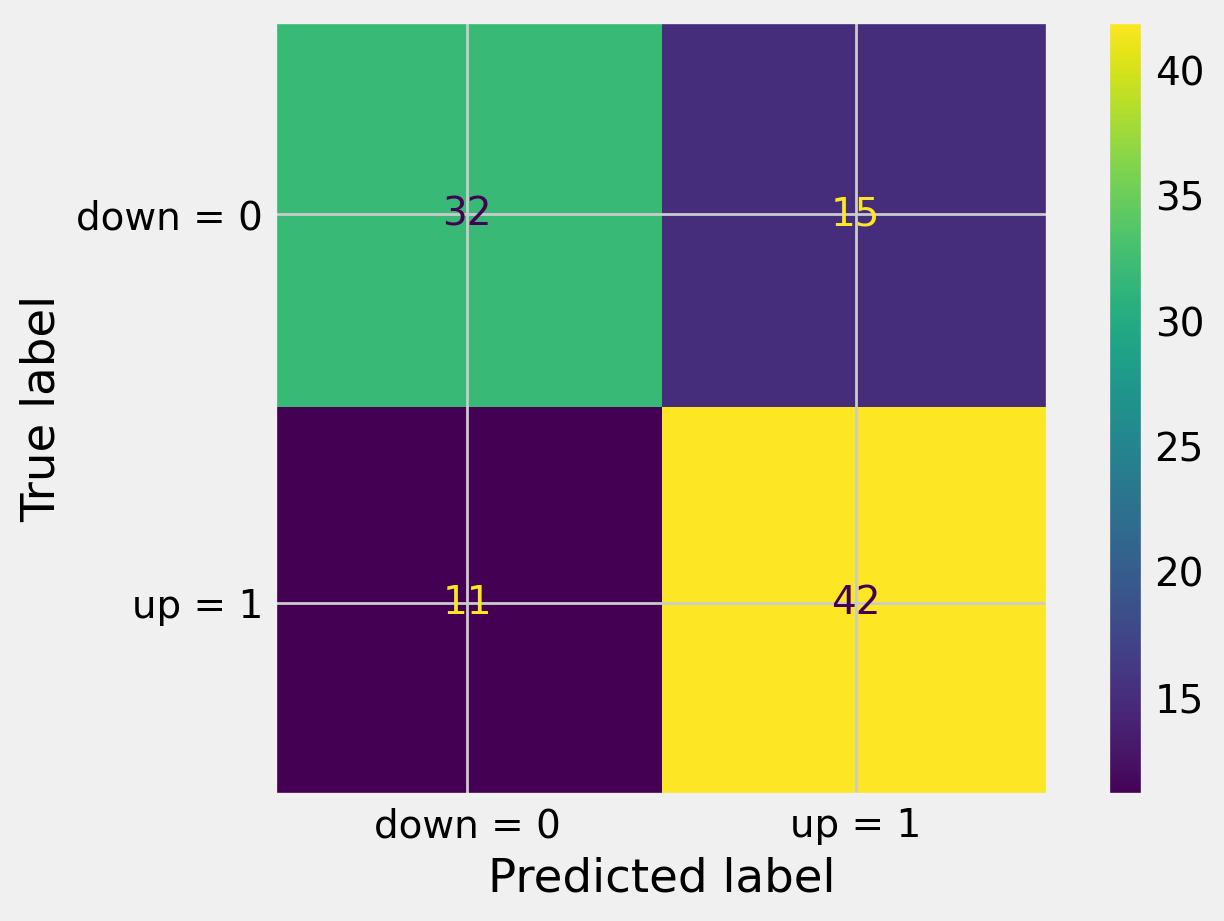

In [43]:
# Plot confusion matrix

lr_cm = confusion_matrix(y_test,lr_model.predict(X_test))
disp = ConfusionMatrixDisplay(lr_cm, display_labels=['down = 0', 'up = 1'])
disp.plot()
plt.show()

#### Fit and evaluate a random forest classifier.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
print(f'Training Accuracy: {rf_model.score(X_train, y_train)}')
print(f'Test Accuracy: {rf_model.score(X_test, y_test):.3f}')


Training Accuracy: 1.0
Test Accuracy: 0.480


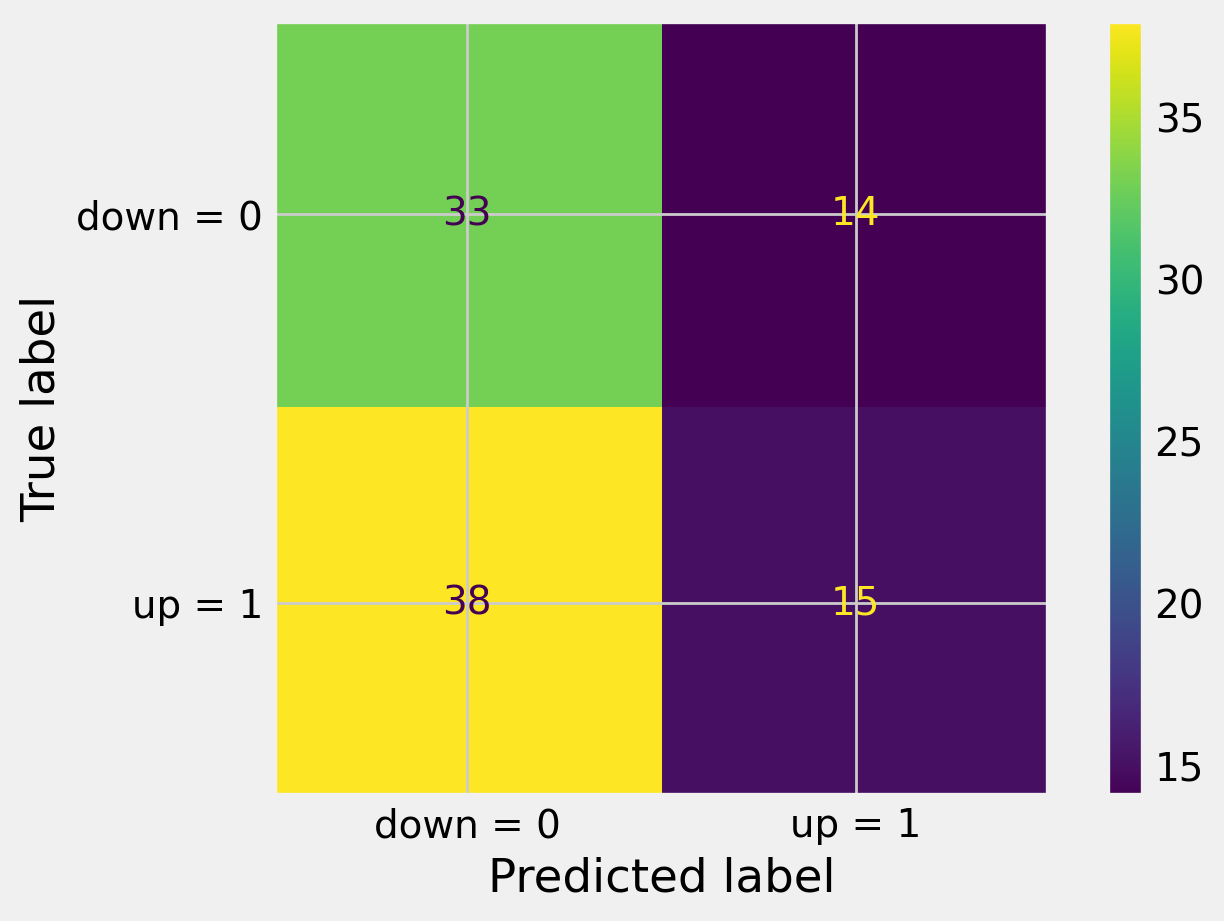

In [51]:
rf_cm = confusion_matrix(y_test,rf_model.predict(X_test))
disp = ConfusionMatrixDisplay(rf_cm, display_labels=['down = 0', 'up = 1'])
disp.plot()
plt.show()

## Compare side by side

<Axes: title={'center': 'Random Forest Confusion Matrix'}>

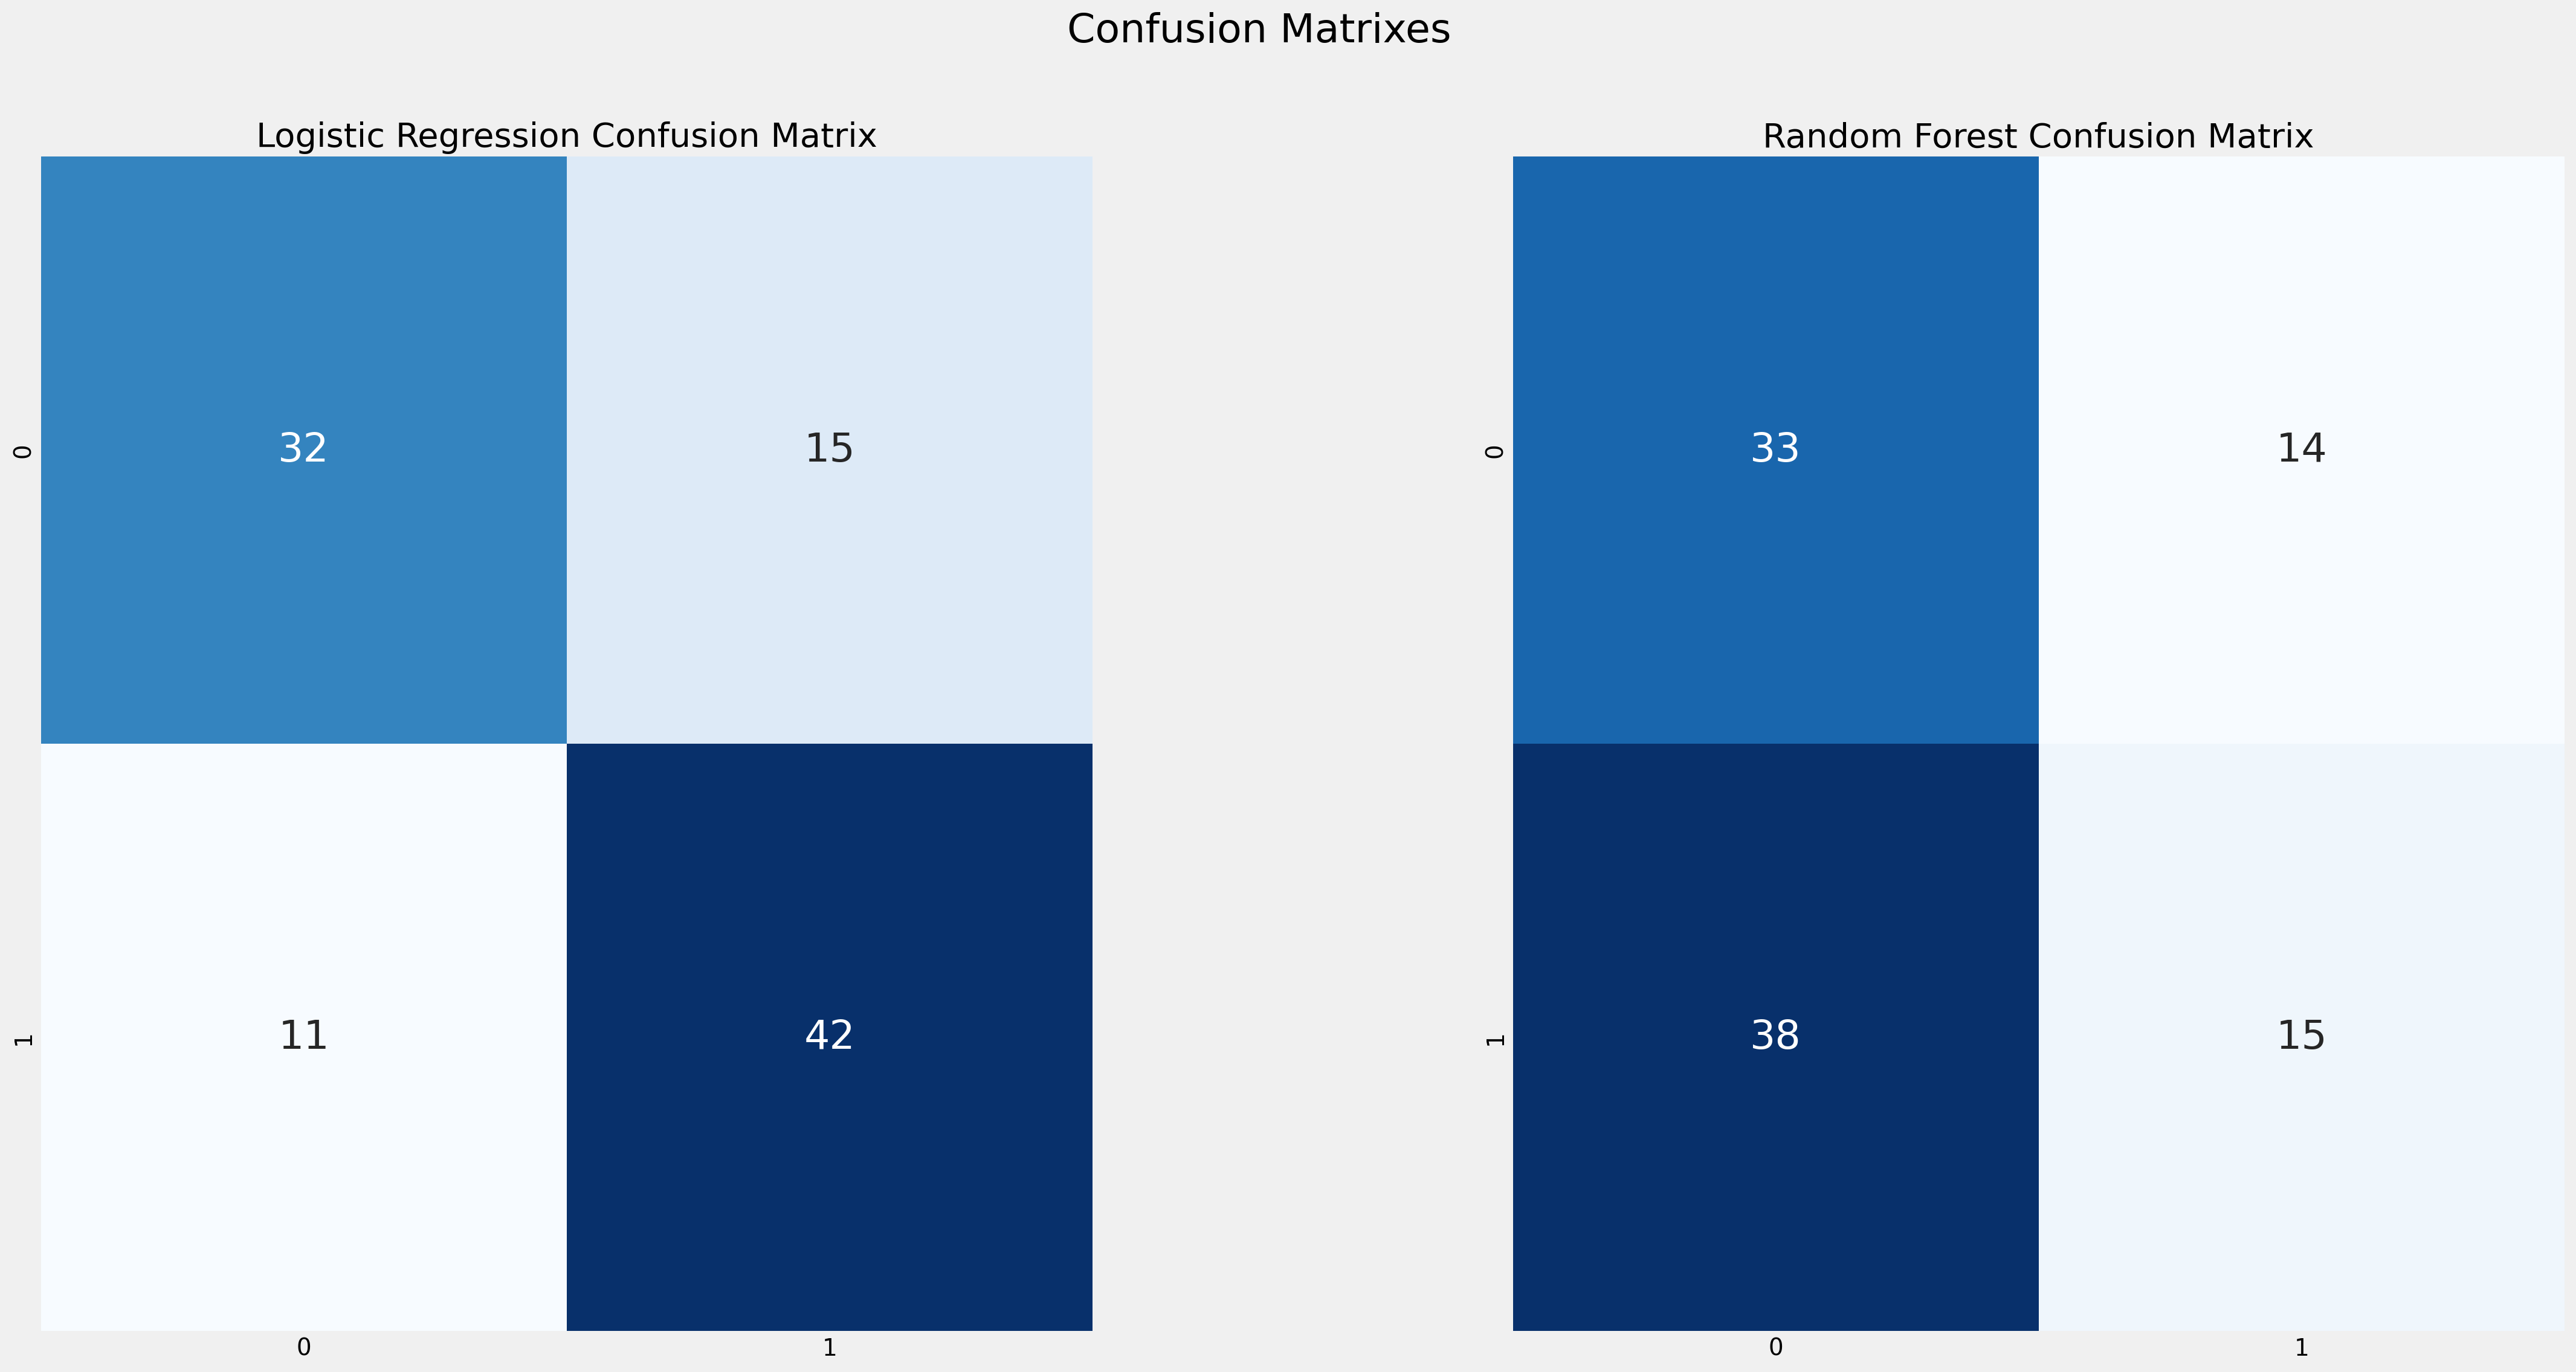

In [52]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1) #2x2 grid position 1
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# add the confusion matrix for random forest
plt.subplot(1,2,2) #2x2 grid position 1
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rf_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

## Evaluating with ROC Curve

Another method of evaluating classification models is to use the ROC (Receiver Operating Characteristic) Curve

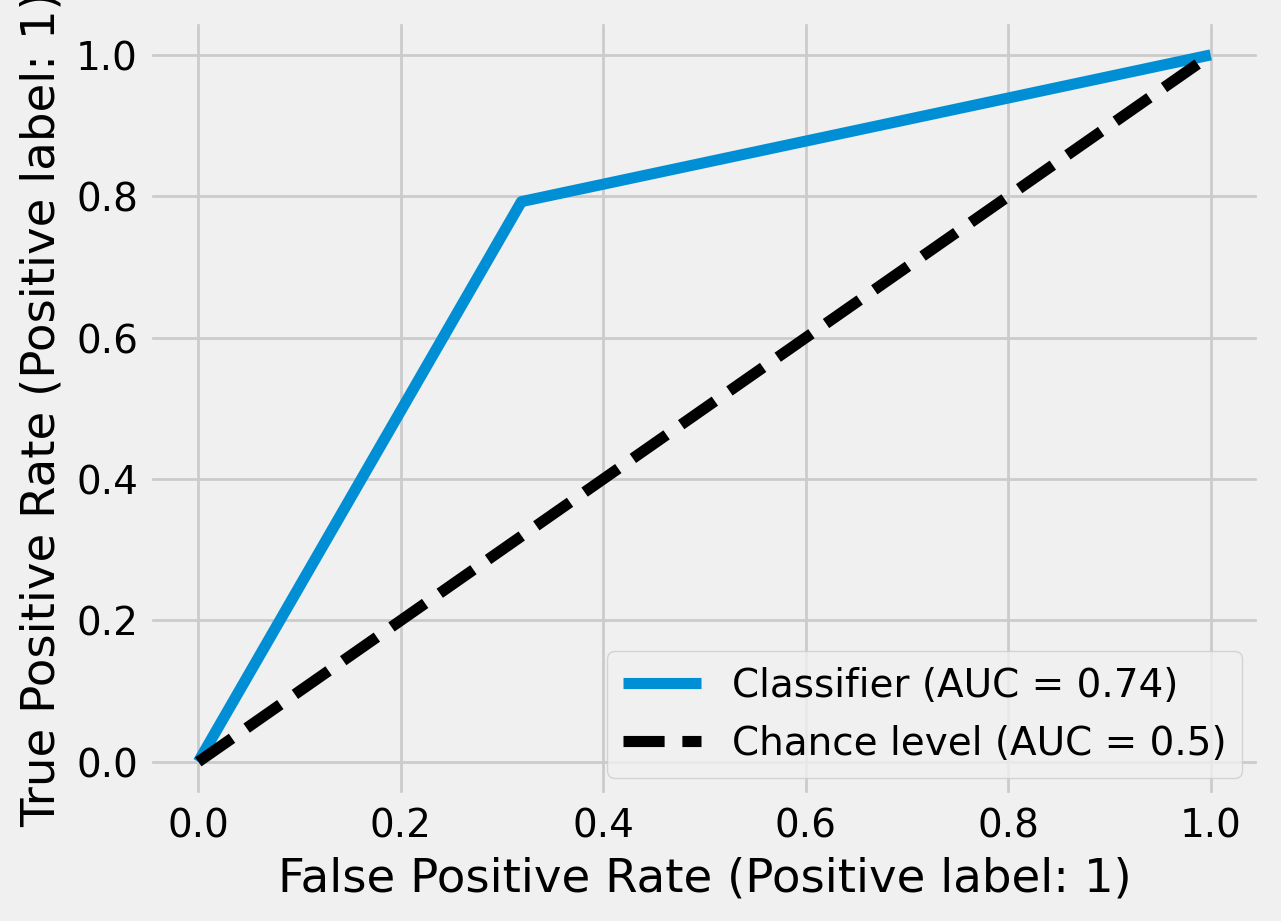

In [53]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, lr_model.predict(X_test), plot_chance_level=True)
plt.show()

### ROC AUC

The more area under this blue curve is, the better separated our distributions are.
- Check out this gif ([source](https://twitter.com/DrHughHarvey/status/1104435699095404544)):

![](https://media.giphy.com/media/H1SZ5oRLIuZ1t1c4Di/giphy.gif)

We use the **area under the ROC curve** (abbreviated **ROC AUC** or **AUC ROC**) to quantify the gap between our distributions.

In [54]:
print(f'AUC Score for Logistic Regression : {roc_auc_score(y_test, lr_model.predict(X_test)):.3f}')


AUC Score for Logistic Regression : 0.737


Show the ROC Curve for the random forest classifer too.


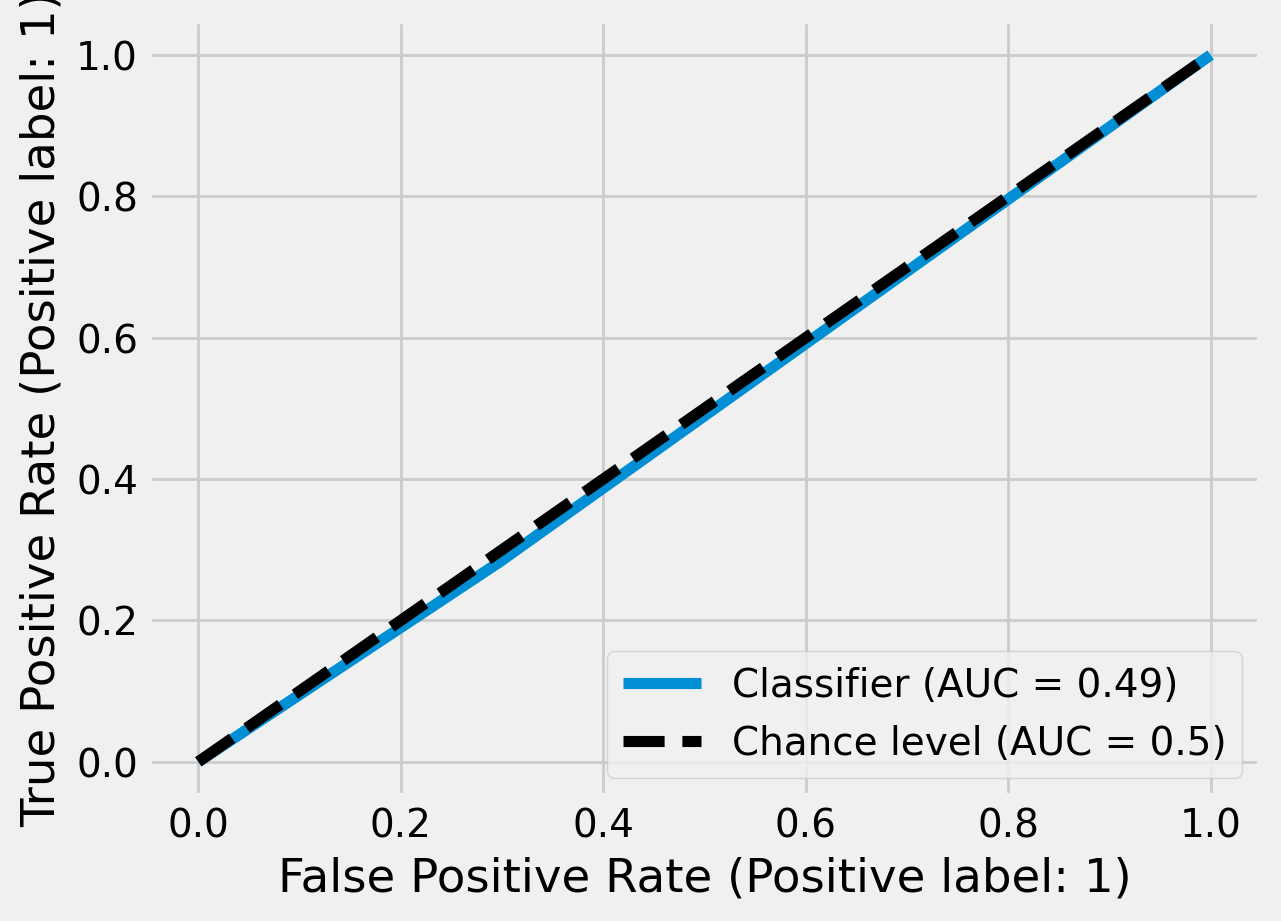

In [55]:
RocCurveDisplay.from_predictions(y_test, rf_model.predict(X_test), plot_chance_level=True)
plt.show()

In [56]:
print(f'AUC Score for Random Forest : {roc_auc_score(y_test, rf_model.predict(X_test)):.3f}')


AUC Score for Random Forest : 0.493


### Interpreting ROC AUC
- If you have an ROC AUC of 0.5, your positive and negative populations perfectly overlap and your model is as bad as it can get.
- If you have an ROC AUC of 1, your positive and negative populations are perfectly separated and your model is as good as it can get.
- The closer your ROC AUC is to 1, the better. (1 is the maximum score.)
- If you have an ROC AUC of below 0.5, your positive and negative distributions have flipped sides. By flipping your predicted values (i.e. flipping predicted 1s and 0s), your ROC AUC will now be above 0.5.
    - Example: You have an ROC AUC of 0.2. If you change your predicted 1s to 0s and your predicted 0s to 1s, your ROC AUC will now be 0.8!

## Conclusion

What conclusions and recommendations can you make about the models that we have developed?